In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import euclidean_distances
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan

from scipy.stats import ttest_ind, shapiro
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot

# plan du notebook

* 1. importation des données et premières observations  


* 2. Observation univarié des variables
  * 2.1 Observation des outliers  
     * 2.1.1 Boxplots  
     * 2.1.2 outliers sur les diagonales des billets  
     * 2.1.3 outliers sur les largeurs des billets  
     * 2.1.4 outliers sur la hauteur gauche des billets
     * 2.1.5 outliers sur la hauteur droite des billets
     * 2.1.6 outliers sur la marge bas des billets
     * 2.1.7 outliers sur la marge haute des billets
  * 2.2 observation de la dispersion des valeurs pour chacune des variables
     * 2.2.1 Histogrammes
     * 2.2.2 description de la distribution de la variable diagonal
     * 2.2.3 description de la distribution de la variable length
     * 2.2.4 description de la distribution de la variable height_left
     * 2.2.5 description de la distribution de la variable height_right
     * 2.2.6 description de la distribution de la variable margin_up
     * 2.2.7 description de la distribution de la variable margin_low


* 3. Traitement des valeurs manquantes par régession linéaire
  * 3.1 séparation du df_billet: séparation df_val_compl et df_manquante
  * 3.2 test de corrélation spearman pour visualiser les liens entre les varaibles
  * 3.3 ajustement du modèle de regression linéaire pour prédire au mieux la varaible margin_low
  * 3.4 Test de la normalité des résidues
  * 3.5 test homoscédasticité des résidus
  * 3.6 test colinéarité
  * 3.7 Test du modèle de regression linéaire sur une partie du dataframe
  * 3.8 Application du modèle pour compléter les valeurs manquantes


* 4. observation bivarié des variables


* 5. répartition vrai billet et faux billet dans le dataframe


* 6. Classification par régression logistique
  * 6.1 regression logistique
  * 6.2 Evaluation de la performance du modèle
  * 6.3 Crétion d'une fonction avec la regression linéaire pour prédire le type de billet sur un dataframe inconnu
  * 6.4 utilisation du modèle de régression linéaire sur le dataframe inconnu


* 7. K-means
  * 7.1 détermination du nombre optimal de cluster par la méthode du coude et la méthode silhouette
  * 7.2 réalisation du K-means
  * 7.3 évaluation de la performance du modèle
  * 7.4 les centroides des clusters
  * 7.5 Crétion d'une fonction avec le k-means pour prédire le type de billet sur un dataframe inconnu
  * 7.6 utilisation de la fonction classifier_km sur le dataframe inconnu

# 1. importation des données et premières observations

Il s'agit ici d'avoir une première idée du dataframe que nous avons en notre possession.  
Ca taille, le type de données à disposition, le nombre de valeurs différentes, les valeurs manquantes...

In [2]:
df_billet = pd.read_csv('billets.csv', sep=';')
df_billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [3]:
df_billet.shape

(1500, 7)

In [4]:
df_billet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
df_billet.describe(include="all")

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,NaN,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,NaN,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,NaN,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,NaN,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,NaN,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000


In [6]:
df_billet.nunique()

is_genuine        2
diagonal        159
height_left     155
height_right    170
margin_low      285
margin_up       123
length          336
dtype: int64

In [7]:
df_billet.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Conformément à ce qui est indiqué dans l'ordre de mission il y a 1500 individus et 7 variables.  
Une des variables est la classification des billets (is_genuine: vrai ou faux), les 6 autres sont des mesures prise sur les billets.  
La colonne length (largeur) est celle avec le plus de valeurs différentes: 336 valeurs différentes.
La colonne is_genuine a une fréquence de True (vrai) de 1000 sur les 1500 observations donc 500 faux (False).

Nous observons 37 valeures nulles dans la variable margin-low (marge du bas)

# 2. Observation univarié des variables

Pour approfondir les premières observations assez superficielles, les observations univariés permettent d'explorer et analyser une à une les variables.  
L'objectif principal des tests univariés est de déterminer s'il existe une différence significative entre les valeurs observées de la variable et celles qui seraient attendues en l'absence d'effet ou de relation spécifique. Ces tests permettent également d'évaluer si une variable suit une distribution spécifique ou si elle présente des valeurs aberrantes.

## 2.1 Observation des outliers

Les outliers, également appelés valeurs aberrantes, sont des observations qui diffèrent considérablement du reste des données d'un échantillon ou d'une distribution. Ces valeurs sont très éloignées des autres observations et peuvent être significativement plus grandes ou plus petites que les autres points de données. Les outliers peuvent être des valeurs extrêmes qui se situent loin de la majorité des données ou des valeurs aberrantes qui ne suivent pas le schéma général de la distribution.

Il y aura une observation, tout d'abord, grace à une visualisation par boxplot de chaque variable.  
Ensuite, la détermination des limites inférieures et supérieures des valeurs aberrantes afin de relever les individus concernés.  
Enfin un t-student pour vérifier si les différences entre les valeurs des vrais billets et faux billets sont assez significatif pour chaque variable afin de réussir à identifier les billets.

### 2.1.1 Boxplot

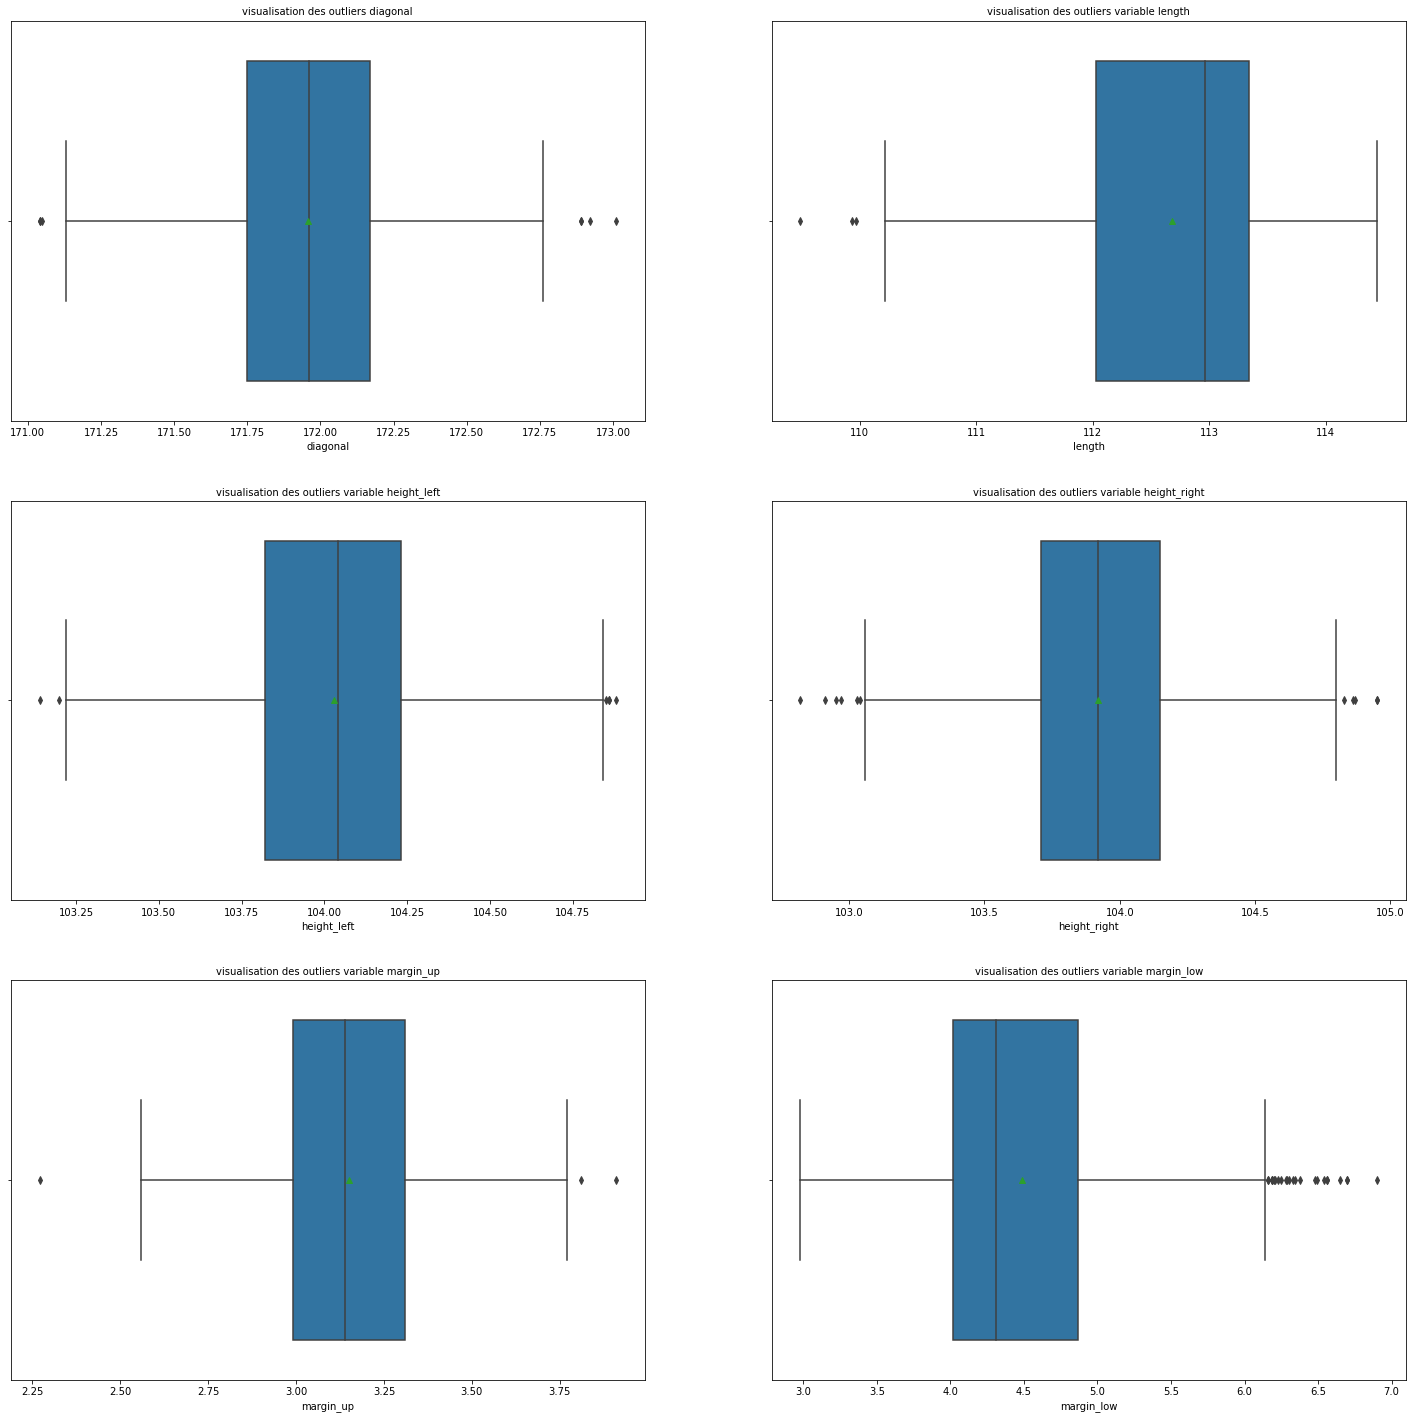

In [8]:
# visualisation en boxplot
plt.figure(figsize=(25,25))

plt.subplot(321)
sns.boxplot(data=df_billet, x="diagonal", showmeans=True)
plt.title("visualisation des outliers diagonal", fontsize =10)

plt.subplot(322)
sns.boxplot(data=df_billet, x="length", showmeans=True)
plt.title("visualisation des outliers variable length", fontsize =10)

plt.subplot(323)
sns.boxplot(data=df_billet, x="height_left", showmeans=True)
plt.title("visualisation des outliers variable height_left", fontsize =10)

plt.subplot(324)
sns.boxplot(data=df_billet, x="height_right", showmeans=True)
plt.title("visualisation des outliers variable height_right", fontsize =10)

plt.subplot(325)
sns.boxplot(data=df_billet, x="margin_up", showmeans=True)
plt.title("visualisation des outliers variable margin_up", fontsize =10)

plt.subplot(326)
sns.boxplot(data=df_billet, x="margin_low", showmeans=True)
plt.title("visualisation des outliers variable margin_low", fontsize =10)

plt.show()

### 2.1.2 outliers sur les diagonales des billets

In [9]:
# Calcul des quartiles pour la variable "diagonal"
q1 = df_billet['diagonal'].quantile(0.25)
q3 = df_billet['diagonal'].quantile(0.75)

# Calcul de l'écart interquartile (IQR)
iqr = q3 - q1

# Calcul des limites supérieure et inférieure pour détecter les valeurs aberrantes
seuil_supérieur_aberrant = q3 + 1.5 * iqr
seuil_inférieur_aberrant = q1 - 1.5 * iqr

# Affichage des limites
print("Limite supérieure pour valeurs aberrantes:", seuil_supérieur_aberrant)
print("Limite inférieure pour valeurs aberrantes:", seuil_inférieur_aberrant)

# Filtrer les valeurs aberrantes
outliers = df_billet[(df_billet['diagonal'] > seuil_supérieur_aberrant) | (df_billet['diagonal'] < seuil_inférieur_aberrant)]

# Affichage des valeurs aberrantes
outliers

Limite supérieure pour valeurs aberrantes: 172.79999999999995
Limite inférieure pour valeurs aberrantes: 171.12


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
729,True,171.04,103.84,103.64,4.22,3.36,112.70
828,True,172.92,103.55,103.94,4.78,3.27,113.55
842,True,172.89,103.77,104.24,4.12,3.01,113.72
1022,False,172.89,104.03,104.03,6.03,3.00,110.95
1142,False,171.04,104.23,104.22,4.87,3.56,111.54
1277,False,173.01,104.59,104.31,5.04,3.05,110.91
1388,False,171.05,104.09,104.50,4.72,3.10,112.44


Des billets avec la même taille en diagonale peuvent se retrouver classé en vrai ou en faux:  
ici nous avons 2 billets de 172,89 l'un est vrai et l'autre est faux

In [10]:
# Séparation des données en groupes de vrais et de faux billets
vrais_billets = df_billet[df_billet['is_genuine'] == True]['diagonal']
faux_billets = df_billet[df_billet['is_genuine'] == False]['diagonal']

# Effectuer le test t de Student
t_statistic, p_value = ttest_ind(vrais_billets, faux_billets)

# Afficher les résultats
print("Statistique t :", t_statistic)
print("p value:", p_value)

Statistique t : 5.184087524514633
p value: 2.4668667372034535e-07


stat t suggère une différence relativement importante entre les moyennes des deux groupes  
la p value indique que la différence observée entre les vrais et les faux billets est significative

### 2.1.3 outliers sur les largeurs des billets

In [11]:
# Calcul des quartiles pour la variable "diagonal"
q1 = df_billet['length'].quantile(0.25)
q3 = df_billet['length'].quantile(0.75)

# Calcul de l'écart interquartile (IQR)
iqr = q3 - q1

# Calcul des limites supérieure et inférieure pour détecter les valeurs aberrantes
seuil_supérieur_aberrant = q3 + 1.5 * iqr
seuil_inférieur_aberrant = q1 - 1.5 * iqr

# Affichage des limites
print("Limite supérieure pour valeurs aberrantes:", seuil_supérieur_aberrant)
print("Limite inférieure pour valeurs aberrantes:", seuil_inférieur_aberrant)

# Filtrer les valeurs aberrantes
outliers = df_billet[(df_billet['length'] > seuil_supérieur_aberrant) | (df_billet['length'] < seuil_inférieur_aberrant)]

# Affichage des valeurs aberrantes
outliers

Limite supérieure pour valeurs aberrantes: 115.305
Limite inférieure pour valeurs aberrantes: 110.065


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1082,False,171.75,103.96,103.83,5.39,3.54,109.49
1355,False,171.68,103.89,103.70,5.97,3.03,109.97
1453,False,171.55,104.20,104.49,5.42,3.54,109.93


Tout les billets outliers pour la largeur sont classés en faux

In [12]:
# Séparation des données en groupes de vrais et de faux billets
vrais_billets = df_billet[df_billet['is_genuine'] == True]['length']
faux_billets = df_billet[df_billet['is_genuine'] == False]['length']

# Effectuer le test t de Student
t_statistic, p_value = ttest_ind(vrais_billets, faux_billets)

# Afficher les résultats
print("Statistique t :", t_statistic)
print("p value :", p_value)

Statistique t : 62.262782927091045
p value : 0.0


La largeur des billets est très significative dans le dataframe pour différencier les vrais et les faux billets

### 2.1.4 outliers sur la hauteur gauche des billets

In [13]:
# Calcul des quartiles pour la variable "diagonal"
q1 = df_billet['height_left'].quantile(0.25)
q3 = df_billet['height_left'].quantile(0.75)

# Calcul de l'écart interquartile (IQR)
iqr = q3 - q1

# Calcul des limites supérieure et inférieure pour détecter les valeurs aberrantes
seuil_supérieur_aberrant = q3 + 1.5 * iqr
seuil_inférieur_aberrant = q1 - 1.5 * iqr

# Affichage des limites
print("Limite supérieure pour valeurs aberrantes:", seuil_supérieur_aberrant)
print("Limite inférieure pour valeurs aberrantes:", seuil_inférieur_aberrant)

# Filtrer les valeurs aberrantes
outliers = df_billet[(df_billet['height_left'] > seuil_supérieur_aberrant) | (df_billet['height_left'] < seuil_inférieur_aberrant)]

# Affichage des valeurs aberrantes
outliers

Limite supérieure pour valeurs aberrantes: 104.84500000000003
Limite inférieure pour valeurs aberrantes: 103.20499999999998


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
224,True,172.12,103.20,103.92,4.46,3.26,113.44
292,True,172.09,103.14,103.81,4.88,3.01,113.69
1090,False,172.11,104.88,104.10,4.80,3.73,110.78
1150,False,171.79,104.86,104.34,5.39,3.14,113.02
1382,False,171.97,104.85,104.52,5.87,3.56,110.98


Comme pour la diagonal, des billets ayant la même hauteur gauche peuvent être classé vrai ou faux:  
ici c'est le cas pour 104,86

In [14]:
# Séparation des données en groupes de vrais et de faux billets
vrais_billets = df_billet[df_billet['is_genuine'] == True]['height_left']
faux_billets = df_billet[df_billet['is_genuine'] == False]['height_left']

# Effectuer le test t de Student
t_statistic, p_value = ttest_ind(vrais_billets, faux_billets)

# Afficher les résultats
print("Statistique t :", t_statistic)
print("p value :", p_value)

Statistique t : -15.8920858636644
p value : 1.1269164017693944e-52


### 2.1.5 outliers sur la hauteur droite des billets

In [15]:
# Calcul des quartiles pour la variable "diagonal"
q1 = df_billet['height_right'].quantile(0.25)
q3 = df_billet['height_right'].quantile(0.75)

# Calcul de l'écart interquartile (IQR)
iqr = q3 - q1

# Calcul des limites supérieure et inférieure pour détecter les valeurs aberrantes
seuil_supérieur_aberrant = q3 + 1.5 * iqr
seuil_inférieur_aberrant = q1 - 1.5 * iqr

# Affichage des limites
print("Limite supérieure pour valeurs aberrantes:", seuil_supérieur_aberrant)
print("Limite inférieure pour valeurs aberrantes:", seuil_inférieur_aberrant)

# Filtrer les valeurs aberrantes
outliers = df_billet[(df_billet['height_right'] > seuil_supérieur_aberrant) | (df_billet['height_right'] < seuil_inférieur_aberrant)]

# Affichage des valeurs aberrantes
outliers

Limite supérieure pour valeurs aberrantes: 104.81000000000003
Limite inférieure pour valeurs aberrantes: 103.04999999999998


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
77,True,171.84,104.09,103.03,4.11,2.77,113.18
176,True,171.75,103.63,102.97,4.46,2.77,113.22
193,True,172.35,103.73,102.95,4.49,3.37,112.49
251,True,171.80,103.26,102.82,NaN,2.95,113.22
522,True,172.02,104.42,102.91,3.86,3.12,113.43
761,True,172.16,103.93,103.04,4.14,2.99,113.26
1199,False,172.03,104.32,104.87,4.49,3.77,111.04
1321,False,172.29,104.72,104.86,5.71,3.16,112.15
1331,False,172.32,104.60,104.83,4.84,3.51,112.55


Il y a plus de outliers classés vrai que faux pour la hauteur droite  
encore une fois des billets de même hauteur droite ce retrouve classer vrai et faux

In [16]:
# Séparation des données en groupes de vrais et de faux billets
vrais_billets = df_billet[df_billet['is_genuine'] == True]['height_right']
faux_billets = df_billet[df_billet['is_genuine'] == False]['height_right']

# Effectuer le test t de Student
t_statistic, p_value = ttest_ind(vrais_billets, faux_billets)

# Afficher les résultats
print("Statistique t :", t_statistic)
print("p value :", p_value)

Statistique t : -21.470310019402618
p value : 2.2708556903459502e-89


Malgré le fait que plus de vrai billet soit retenue comme outliers, les mesures hauteur droite restent significatives pour différencier vrai et faux billets

### 2.1.6 outliers sur la marge bas des billets

In [17]:
# Calcul des quartiles pour la variable "diagonal"
q1 = df_billet['margin_low'].quantile(0.25)
q3 = df_billet['margin_low'].quantile(0.75)

# Calcul de l'écart interquartile (IQR)
iqr = q3 - q1

# Calcul des limites supérieure et inférieure pour détecter les valeurs aberrantes
seuil_supérieur_aberrant = q3 + 1.5 * iqr
seuil_inférieur_aberrant = q1 - 1.5 * iqr

# Affichage des limites
print("Limite supérieure pour valeurs aberrantes:", seuil_supérieur_aberrant)
print("Limite inférieure pour valeurs aberrantes:", seuil_inférieur_aberrant)

# Filtrer les valeurs aberrantes
outliers = df_billet[(df_billet['margin_low'] > seuil_supérieur_aberrant) | (df_billet['margin_low'] < seuil_inférieur_aberrant)]

# Affichage des valeurs aberrantes
outliers

Limite supérieure pour valeurs aberrantes: 6.152500000000001
Limite inférieure pour valeurs aberrantes: 2.732499999999999


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
1023,False,172.02,104.26,104.20,6.20,3.58,111.25
1027,False,171.63,104.02,104.66,6.70,3.28,111.28
1031,False,172.40,104.00,103.82,6.33,3.10,112.11
1041,False,171.77,104.12,104.42,6.65,3.63,111.53
1053,False,171.85,104.52,104.05,6.21,3.43,111.96
1075,False,172.02,104.51,103.69,6.23,3.39,112.35
1092,False,171.87,104.76,104.02,6.30,3.61,111.29
1110,False,171.73,104.32,104.07,6.56,3.30,112.80
1124,False,171.88,103.92,104.27,6.70,3.11,110.93
1133,False,171.79,103.99,103.67,6.16,3.52,110.93


il y a beaucoup plus de outliers mais ils sont tous classé comme faux billets

In [18]:
# récupération des individus sans valeur manquante pour pouvoir effectuer le test statistique
df_val_compl = df_billet.dropna(subset=['margin_low'])
df_val_compl

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [19]:
# Séparation des données en groupes de vrais et de faux billets
vrais_billets = df_val_compl[df_val_compl['is_genuine'] == True]['margin_low']
faux_billets = df_val_compl[df_val_compl['is_genuine'] == False]['margin_low']

# Effectuer le test t de Student
t_statistic, p_value = ttest_ind(vrais_billets, faux_billets)

# Afficher les résultats
print("Statistique t :", t_statistic)
print("p value :", p_value)

Statistique t : -48.12019878912702
p value : 1.3620340580588674e-303


Les écarts sont significatifs pour la marge basse

### 2.1.7 outliers sur la marge haute des billets

In [20]:
# Calcul des quartiles pour la variable "diagonal"
q1 = df_billet['margin_up'].quantile(0.25)
q3 = df_billet['margin_up'].quantile(0.75)

# Calcul de l'écart interquartile (IQR)
iqr = q3 - q1

# Calcul des limites supérieure et inférieure pour détecter les valeurs aberrantes
seuil_supérieur_aberrant = q3 + 1.5 * iqr
seuil_inférieur_aberrant = q1 - 1.5 * iqr

# Affichage des limites
print("Limite supérieure pour valeurs aberrantes:", seuil_supérieur_aberrant)
print("Limite inférieure pour valeurs aberrantes:", seuil_inférieur_aberrant)

# Filtrer les valeurs aberrantes
outliers = df_billet[(df_billet['margin_up'] > seuil_supérieur_aberrant) | (df_billet['margin_up'] < seuil_inférieur_aberrant)]

# Affichage des valeurs aberrantes
outliers

Limite supérieure pour valeurs aberrantes: 3.79
Limite inférieure pour valeurs aberrantes: 2.5100000000000007


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
664,True,172.05,103.70,103.75,5.04,2.27,113.55
1029,False,171.96,104.29,104.03,6.01,3.91,110.83
1270,False,171.26,104.22,104.07,4.78,3.81,112.88


Il y a peu d'outliers mais l'un est classé vrai

In [21]:
# Séparation des données en groupes de vrais et de faux billets
vrais_billets = df_billet[df_billet['is_genuine'] == True]['margin_up']
faux_billets = df_billet[df_billet['is_genuine'] == False]['margin_up']

# Effectuer le test t de Student
t_statistic, p_value = ttest_ind(vrais_billets, faux_billets)

# Afficher les résultats
print("Statistique t :", t_statistic)
print("p value :", p_value)

Statistique t : -29.50561631725463
p value : 3.144530308715909e-151


Les écarts restent significatif.

* conclusion concernant les outliers:  
certains vrais billets présentent des valeurs aberrantes sur certaines mesures, cela peut indiquer qu'il y a des variations naturelles dans les caractéristique des vrais billets (production, vieillissement...)

## 2.2 observation de la dispersion des valeurs pour chacune des variables

la dispersion des valeurs permet d'obtenir une meilleure compréhension de la distribution des données et des variations présentes dans l'échantillon ou la population. La dispersion des valeurs d'une variable mesure à quel point les valeurs individuelles s'écartent de la tendance centrale, comme la moyenne ou la médiane.

Pour observer la dispersion des valeurs, un histogramme va être réalisé pour chaque variable.  
Va aussi être repris le mode, moyenne, min, max (vu dans le describe de la première partie mais de façon plus détaillée) 

### 2.2.1 Histogrammes

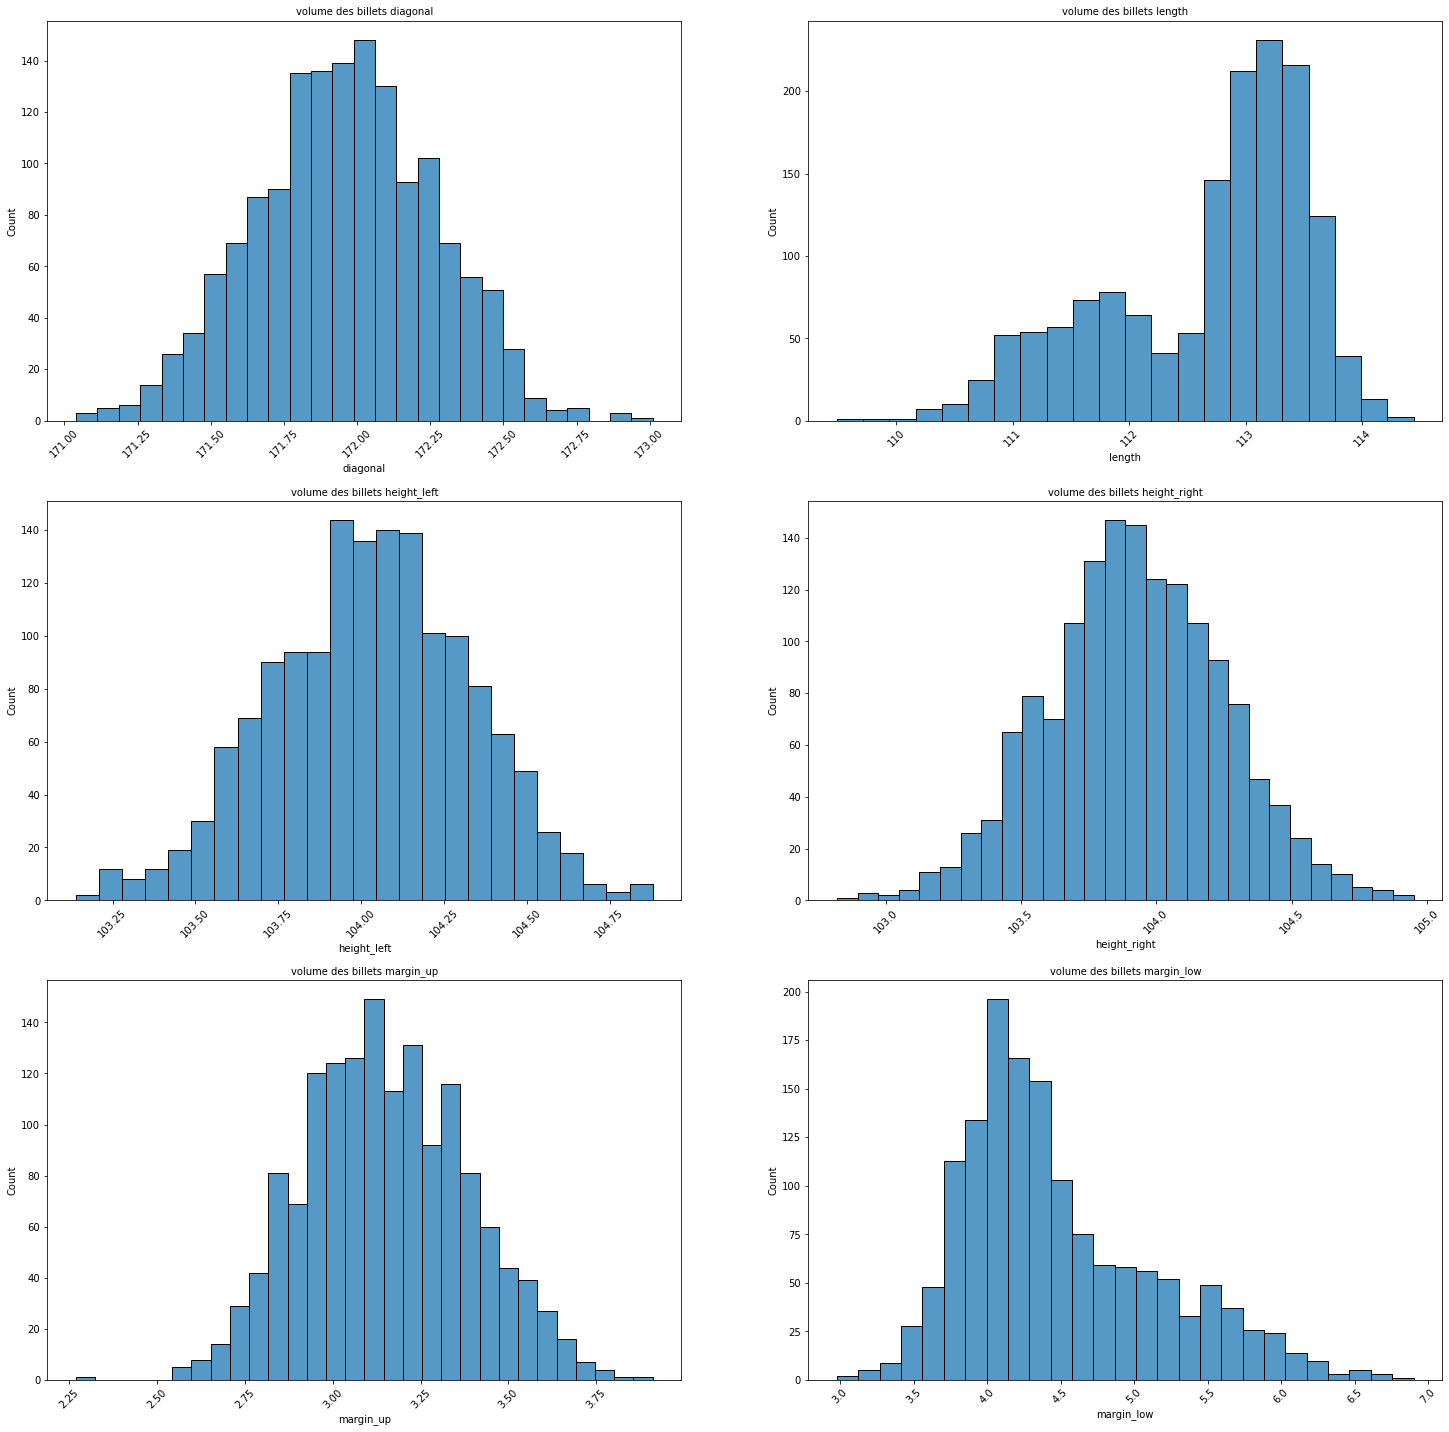

In [22]:
plt.figure(figsize=(25,25))

plt.subplot(321)
sns.histplot(data=df_billet, x='diagonal')
plt.xticks(rotation=45)
plt.title("volume des billets diagonal", fontsize =10)

plt.subplot(322)
sns.histplot(data=df_billet, x="length")
plt.xticks(rotation=45)
plt.title("volume des billets length", fontsize =10)

plt.subplot(323)
sns.histplot(data=df_billet, x="height_left")
plt.xticks(rotation=45)
plt.title("volume des billets height_left", fontsize =10)

plt.subplot(324)
sns.histplot(data=df_billet, x="height_right")
plt.xticks(rotation=45)
plt.title("volume des billets height_right", fontsize =10)

plt.subplot(325)
sns.histplot(data=df_billet, x="margin_up")
plt.xticks(rotation=45)
plt.title("volume des billets margin_up", fontsize =10)

plt.subplot(326)
sns.histplot(data=df_billet, x="margin_low")
plt.xticks(rotation=45)
plt.title("volume des billets margin_low", fontsize =10)

plt.show()

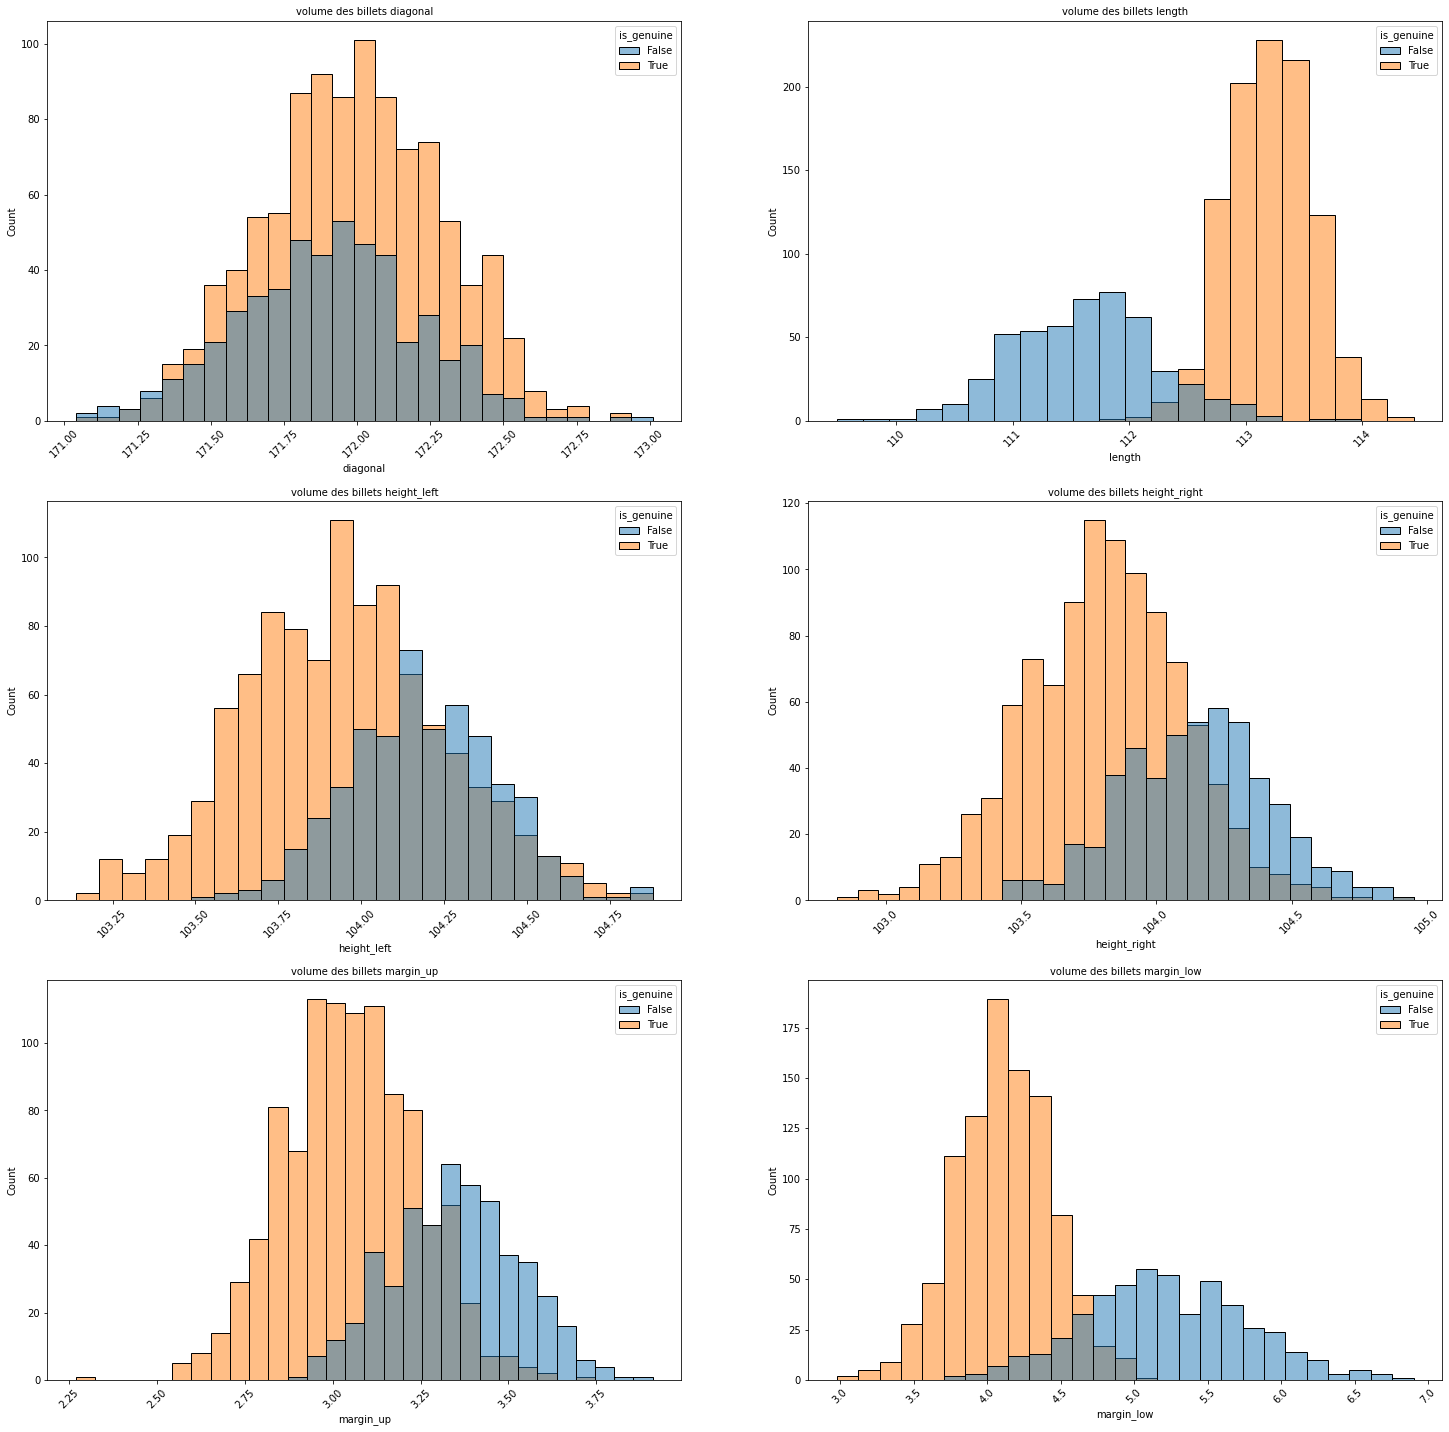

In [23]:
plt.figure(figsize=(25,25))

plt.subplot(321)
sns.histplot(data=df_billet, x='diagonal', hue= 'is_genuine')
plt.xticks(rotation=45)
plt.title("volume des billets diagonal", fontsize =10)

plt.subplot(322)
sns.histplot(data=df_billet, x="length", hue= 'is_genuine')
plt.xticks(rotation=45)
plt.title("volume des billets length", fontsize =10)

plt.subplot(323)
sns.histplot(data=df_billet, x="height_left", hue= 'is_genuine')
plt.xticks(rotation=45)
plt.title("volume des billets height_left", fontsize =10)

plt.subplot(324)
sns.histplot(data=df_billet, x="height_right", hue= 'is_genuine')
plt.xticks(rotation=45)
plt.title("volume des billets height_right", fontsize =10)

plt.subplot(325)
sns.histplot(data=df_billet, x="margin_up", hue= 'is_genuine')
plt.xticks(rotation=45)
plt.title("volume des billets margin_up", fontsize =10)

plt.subplot(326)
sns.histplot(data=df_billet, x="margin_low", hue= 'is_genuine')
plt.xticks(rotation=45)
plt.title("volume des billets margin_low", fontsize =10)

plt.show()

### 2.2.2 description de la distribution de la variable diagonal

In [24]:
val_min = df_billet['diagonal'].min()
val_max = df_billet['diagonal'].max()
moyenne = df_billet['diagonal'].mean()
median = df_billet['diagonal'].median()
val_freq = df_billet['diagonal'].mode().iloc[0]
ec_typ = df_billet['diagonal'].std()

print(f"la valeur minimal de la colonne est de: {val_min}")
print(f"la valeur maximal de la colonne est de: {val_max}")
print(f"la moyenne de la colonne est de: {moyenne}")
print(f"la médiane de la colonne est de: {median}")
print(f"la valeur la plus fréquente est: {val_freq}")
print(f"l'écart type est de: {ec_typ}")

la valeur minimal de la colonne est de: 171.04
la valeur maximal de la colonne est de: 173.01
la moyenne de la colonne est de: 171.9584399999998
la médiane de la colonne est de: 171.96
la valeur la plus fréquente est: 171.99
l'écart type est de: 0.3051951219165014


* distribution générale de la variable diagonal:  
l’ensemble de la distribution a une forme de distribution normale car la majorité des valeurs se concentre autour de la moyenne. Les valeurs extrêmes sont moins fréquentes et se produisent à l’extérieur des zones centrales de la distribution. Dans une distribution normale la médiane et la moyenne sont égales, pour la variable diagonal les deux valeurs sont très proches.  
* distribution en fonction de la classification true/false:  
les deux distributions ont une forme similaire de cloche et semble suivre aussi la distribution normale et ont leurs piques extremements proches

### 2.2.3 description de la distribution de la variable length

In [25]:
val_min = df_billet['length'].min()
val_max = df_billet['length'].max()
moyenne = df_billet['length'].mean()
median = df_billet['length'].median()
val_freq = df_billet['length'].mode().iloc[0]
ec_typ = df_billet['length'].std()

print(f"la valeur minimal de la colonne est de: {val_min}")
print(f"la valeur maximal de la colonne est de: {val_max}")
print(f"la moyenne de la colonne est de: {moyenne}")
print(f"la médiane de la colonne est de: {median}")
print(f"la valeur la plus fréquente est: {val_freq}")
print(f"l'écart type est de: {ec_typ}")

la valeur minimal de la colonne est de: 109.49
la valeur maximal de la colonne est de: 114.44
la moyenne de la colonne est de: 112.67850000000006
la médiane de la colonne est de: 112.96
la valeur la plus fréquente est: 113.38
l'écart type est de: 0.8727298101633162


* distribution générale de la variable length:  
La distribution est bimodale car on observe deux pics sur l’histogramme. L’échantillon n’est pas homogène, mais composé de plusieurs familles d’individus présentant des caractéristiques différentes.
* distribution en fonction de la classification true/false:  
Les deux pics observés correspondent à la distribution des billets vrai et des billets faux. Regardé séparément chacun des tracé suit une distribution normale mais sont décalé l'un par rapport à l'autre ce qui explique les pics séparés.

### 2.2.4 description de la distribution de la variable height_left

In [26]:
val_min = df_billet['height_left'].min()
val_max = df_billet['height_left'].max()
moyenne = df_billet['height_left'].mean()
median = df_billet['height_left'].median()
val_freq = df_billet['height_left'].mode().iloc[0]
ec_typ = df_billet['height_left'].std()

print(f"la valeur minimal de la colonne est de: {val_min}")
print(f"la valeur maximal de la colonne est de: {val_max}")
print(f"la moyenne de la colonne est de: {moyenne}")
print(f"la médiane de la colonne est de: {median}")
print(f"la valeur la plus fréquente est: {val_freq}")
print(f"l'écart type est de: {ec_typ}")

la valeur minimal de la colonne est de: 103.14
la valeur maximal de la colonne est de: 104.88
la moyenne de la colonne est de: 104.02953333333326
la médiane de la colonne est de: 104.04
la valeur la plus fréquente est: 103.95
l'écart type est de: 0.2994616843980283


* distribution générale de la variable height_left:  
la distribution générale est unimodale. L’ensemble de la distribution a une forme de distribution normale car la majorité des valeurs se concentre autour de la moyenne. Les valeurs extrêmes sont moins fréquentes et se produisent à l’extérieur des zones centrales de la distribution. La moyenne et la médiane sont très proche. 
* distribution en fonction de la classification true/false:  
les deux distributions ont une forme de distribution normal et sont imbriquées l'une dans l'autre avec un lèger décalage des piques

### 2.2.5 description de la distribution de la variable height_right

In [27]:
val_min = df_billet['height_right'].min()
val_max = df_billet['height_right'].max()
moyenne = df_billet['height_right'].mean()
median = df_billet['height_right'].median()
val_freq = df_billet['height_right'].mode().iloc[0]
ec_typ = df_billet['height_right'].std()

print(f"la valeur minimal de la colonne est de: {val_min}")
print(f"la valeur maximal de la colonne est de: {val_max}")
print(f"la moyenne de la colonne est de: {moyenne}")
print(f"la médiane de la colonne est de: {median}")
print(f"la valeur la plus fréquente est: {val_freq}")
print(f"l'écart type est de: {ec_typ}")

la valeur minimal de la colonne est de: 102.82
la valeur maximal de la colonne est de: 104.95
la moyenne de la colonne est de: 103.92030666666666
la médiane de la colonne est de: 103.92
la valeur la plus fréquente est: 103.76
l'écart type est de: 0.325627079062283


* distribution générale de la variable height_right:  
la distribution générale est unimodale. L’ensemble de la distribution a une forme de distribution normale car la majorité des valeurs se concentre autour de la moyenne. Les valeurs extrêmes sont moins fréquentes et se produisent à l’extérieur des zones centrales de la distribution. La moyenne et la médiane sont très proche.
* distribution en fonction de la classification true/false:  
les deux distributions ont une forme de distribution normal et sont imbriquées l'une dans l'autre avec un lèger décalage des piques

### 2.2.6 description de la distribution de la variable margin_up

In [28]:
val_min = df_billet['margin_up'].min()
val_max = df_billet['margin_up'].max()
moyenne = df_billet['margin_up'].mean()
median = df_billet['margin_up'].median()
val_freq = df_billet['margin_up'].mode().iloc[0]
ec_typ = df_billet['margin_up'].std()

print(f"la valeur minimal de la colonne est de: {val_min}")
print(f"la valeur maximal de la colonne est de: {val_max}")
print(f"la moyenne de la colonne est de: {moyenne}")
print(f"la médiane de la colonne est de: {median}")
print(f"la valeur la plus fréquente est: {val_freq}")
print(f"l'écart type est de: {ec_typ}")

la valeur minimal de la colonne est de: 2.27
la valeur maximal de la colonne est de: 3.91
la moyenne de la colonne est de: 3.1514733333333296
la médiane de la colonne est de: 3.14
la valeur la plus fréquente est: 3.08
l'écart type est de: 0.23181311618653702


* distribution générale de la variable margin_up:  
la distribution est multimodale car elle a plusieurs piques. L'échantillon n'est pas homogène.
* distribution en fonction de la classification true/false:  
en regardant séparément deux pics semble plus proche d'une distribution normale mais n'explique pas l'ensemble des pics

### 2.2.7 description de la distribution de la variable margin_low

In [29]:
val_min = df_billet['margin_low'].min()
val_max = df_billet['margin_low'].max()
moyenne = df_billet['margin_low'].mean()
median = df_billet['margin_low'].median()
val_freq = df_billet['margin_low'].mode().iloc[0]
ec_typ = df_billet['margin_low'].std()

print(f"la valeur minimal de la colonne est de: {val_min}")
print(f"la valeur maximal de la colonne est de: {val_max}")
print(f"la moyenne de la colonne est de: {moyenne}")
print(f"la médiane de la colonne est de: {median}")
print(f"la valeur la plus fréquente est: {val_freq}")
print(f"l'écart type est de: {ec_typ}")

la valeur minimal de la colonne est de: 2.98
la valeur maximal de la colonne est de: 6.9
la moyenne de la colonne est de: 4.485967190704034
la médiane de la colonne est de: 4.31
la valeur la plus fréquente est: 4.08
l'écart type est de: 0.6638126241773387


* distribution générale de la variable margin_low:  
La distribution est unimodale mais asymétrique vers la gauche.
* distribution en fonction de la classification true/false:  
quand ont regarde séparément les vrai et faux billets nous retrouvons deux distributions normales. La distribution des faux billets est très étalée et le pic est fable ce qui donne l'effet général de distribution asymétrique

# 3. Traitement des valeurs manquantes par imputation par régession linéaire

La régression linéaire est une technique d'apprentissage automatique qui vise à établir une relation linéaire entre une variable cible (ou variable dépendante) et un ensemble de variables d'entrée (ou variables indépendantes). Elle est couramment utilisée pour la prédiction et l'estimation de valeurs numériques continues.

Le modèle de régression linéaire suppose que la variable cible est une combinaison linéaire des variables d'entrée, pondérée par des coefficients spécifiques. Ces coefficients représentent l'effet de chaque variable d'entrée sur la variable cible.

## 3.1 séparation du df_billet: séparation df_val_compl et df_manquante

In [30]:
# dataframe sans valeurs manquantes
df_val_compl

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [31]:
# récupération des individus ayant des valeurs manquantes
df_manquante = df_billet[df_billet['margin_low'].isnull()]
df_manquante.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36


## 3.2 test de corrélation spearman pour visualiser les liens entre les variables

Le test de corrélation de Spearman est une méthode statistique non paramétrique utilisée pour évaluer la relation entre deux variables. Contrairement au test de corrélation de Pearson, qui mesure la corrélation linéaire entre deux variables continues, le test de Spearman évalue la corrélation monotone, c'est-à-dire toute relation monotone, qu'elle soit linéaire ou non. Il est particulièrement adapté aux données ordinales ou non normalement distribuées.

<AxesSubplot:>

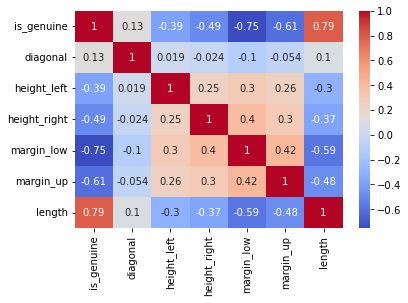

In [32]:
# corrélation des variable sur le dataframe complet
correlation_matrix = df_val_compl.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

Les plus fortes corrélation négative de margin_low (variable où il manque des valeurs) sont avec lenght (largeur), is_genuine (vrai/faux).  
La corrélation ppositive la plus forte est avec la variable margin_up avec 0.42

## 3.3 ajustement du modèle de regression linéaire pour prédire au mieux la varaible margin_low

In [33]:
# On importe les données, puis on utilise la commande lm pour régresser df_billet en fonction des autres variables de l'échantillon.
# Pour optimiser R²
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up+length', data=df_val_compl).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          4.75e-299
Time:                        13:54:31   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

La variable lenght est celle avec la plus forte p-value, nous allons la suprimer et vérifier de nouveau le R².

In [34]:
reg_multi = smf.ols('margin_low~is_genuine+diagonal+height_left+height_right+margin_up', data=df_val_compl).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          2.12e-300
Time:                        13:54:31   Log-Likelihood:                -774.15
No. Observations:                1463   AIC:                             1560.
Df Residuals:                    1457   BIC:                             1592.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.4247      7

La R² reste constante après la suppression de lenght: 0.617  
La variable diagonal est la suivante avec la p-value la plus importante, nous allons la suprimer et vérifier de nouveau le R².

In [35]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+height_right+margin_up', data=df_val_compl).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          8.76e-302
Time:                        13:54:32   Log-Likelihood:                -774.21
No. Observations:                1463   AIC:                             1558.
Df Residuals:                    1458   BIC:                             1585.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3902      5

La R² reste constante après la suppression de diagonal: 0.617  
La variable suivante avec la p-value la plus importante est height_right, nous allons la supprimer et vérifier de nouveau R²

In [36]:
reg_multi = smf.ols('margin_low~is_genuine+height_left+margin_up', data=df_val_compl).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          3.63e-303
Time:                        13:54:32   Log-Likelihood:                -774.45
No. Observations:                1463   AIC:                             1557.
Df Residuals:                    1459   BIC:                             1578.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9104      4

La R² reste constante après la suppression de height right: 0.617  
La variable avec la p-value la plus importante est, ensuite, height_left, nous allons la supprimer et vérifier de nouveau R²

In [37]:
reg_multi = smf.ols('margin_low~is_genuine+margin_up', data=df_val_compl).fit()
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Fri, 11 Aug 2023   Prob (F-statistic):          1.24e-304
Time:                        13:54:33   Log-Likelihood:                -774.73
No. Observations:                1463   AIC:                             1555.
Df Residuals:                    1460   BIC:                             1571.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              5.9263      0

En conservant seulement les variables is_genuine et margin_up nous concervant un R² de 0.617.  

## 3.4 Test de la normalité des résidues

Dans le contexte d'une régression linéaire, les résidus font référence aux différences entre les valeurs observées et les valeurs prédites par le modèle. Plus précisément, pour chaque observation dans l'ensemble de données, le résidu correspond à la différence entre la valeur observée de la variable dépendante et la valeur prédite par le modèle pour cette observation.

Statistique de test : 0.9936248064041138
Valeur p : 6.20942773821298e-06
H0 rejetée : la distribution des résidus est probablement non normale


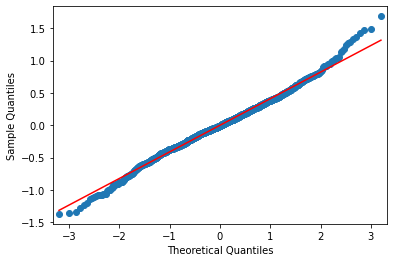

In [38]:
# Récupérer les résidus du modèle
residues = reg_multi.resid
# Effectuer le test de Shapiro-Wilk
shapiro_stat, shapiro_p_value = stats.shapiro(residues)

# Afficher les résultats
print('Statistique de test :', shapiro_stat)
print('Valeur p :', shapiro_p_value)

# Vérifier l'hypothèse nulle et afficher le résultat
if shapiro_p_value > 0.05:
    print('H0 acceptée : la distribution des résidus est probablement normale')
else:
    print('H0 rejetée : la distribution des résidus est probablement non normale')

# Tracer le QQ-plot des résidus
qqplot(residues, line='s')
plt.show()

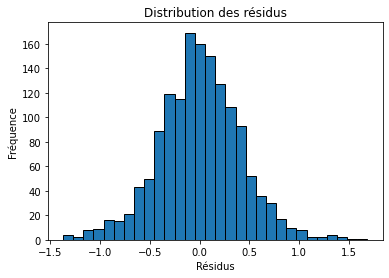

In [39]:
plt.hist(residues, bins=30, edgecolor='black')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Distribution des résidus')
plt.show()

Les résidus ne suivent pas une distribution normale
Pour l'interprétation du test de normalité Shapiro-Wilk, il est recommandé de prendre en compte à la fois la p-value et la taille de l'échantillon. Une p-value = '0,00000383566' faible indique une déviation significative par rapport à la normalité, mais cela peut être influencé par la taille de l'échantillon n= 1500  
Néanmoins, l'observation des résidus, le fait qu'ils ne soient pas très différents d'une distribution symétrique, et le fait que l'échantillon soit de taille suffisante (supérieure à 30) permettent de dire que les résultats obtenus par le modèle linéaire gaussien ne sont pas absurdes, même si le résidu n'est pas considéré comme étant gaussien.

## 3.5 test homoscédasticité des résidus

Nous allons utiliser le test de Breusch-Pagan pour évaluer l'hypothèse d'homoscédasticité des résidus dans un modèle de régression. Il permet de vérifier si la variance des résidus est constante à travers différentes valeurs prédites.

* LM Statistique (Lagrange Multiplier Statistic) : Cette statistique est calculée à partir de la régression supplémentaire des résidus au carré sur les variables explicatives du modèle. Elle mesure l'effet global de l'hétéroscédasticité. Plus la valeur de la LM Statistique est élevée, plus il y a de preuves de l'existence d'une hétéroscédasticité.

* LM p-value : C'est la valeur p associée à la LM Statistique. La valeur p indique la probabilité d'observer une statistique de test aussi extrême que celle observée, sous l'hypothèse nulle d'homoscédasticité (absence d'hétéroscédasticité). Une valeur p faible (généralement inférieure à 0,05) suggère des preuves solides pour rejeter l'hypothèse nulle et conclure à l'existence d'une hétéroscédasticité.

* F-Statistique : Cette statistique est calculée à partir de la comparaison entre la variation expliquée par les variables explicatives et la variation non expliquée dans le modèle. Elle mesure l'effet global de l'hétéroscédasticité en comparant la variation entre les groupes (variation expliquée) à la variation à l'intérieur des groupes (variation non expliquée).

* F p-value : C'est la valeur p associée à la F-Statistique. Elle indique la probabilité d'observer une statistique de test aussi extrême que celle observée, sous l'hypothèse nulle d'homoscédasticité. Une valeur p faible suggère des preuves solides pour rejeter l'hypothèse nulle et conclure à l'existence d'une hétéroscédasticité.

In [40]:
# Effectuer le test de Breusch-Pagan
lm, lm_p_value, fvalue, f_p_value = sms.het_breuschpagan(reg_multi.resid, reg_multi.model.exog)

# Afficher les résultats
print("Test de Breusch-Pagan:")
print("LM Statistique:", lm)
print("LM p-value:", lm_p_value)
print("F-Statistique:", fvalue)
print("F p-value:", f_p_value)

Test de Breusch-Pagan:
LM Statistique: 163.4577287302703
LM p-value: 3.2033559115838186e-36
F-Statistique: 91.82013129631447
F p-value: 2.74562835936448e-38


Ces résultats indiquent que la p-value du test est extrêmement faible, proche de zéro. Cela suggère qu'il y a des preuves statistiquement significatives pour rejeter l'hypothèse nulle d'homoscédasticité, ce qui signifie que les résidus de la régression linéaire présentent une hétéroscédasticité.  

En d'autres termes, la variance des résidus n'est pas constante et varie en fonction des valeurs des variables explicatives.

## 3.6 test colinéarité

Les résultats du test de colinéarité indiquent les valeurs du facteur d'inflation de la variance (Variance Inflation Factor, VIF) pour chaque variable indépendante incluse dans le modèle de régression multiple.

Un VIF supérieur à 1 suggère une certaine corrélation entre la variable indépendante correspondante et les autres variables indépendantes dans le modèle. Plus précisément, un VIF de 1 indique l'absence de corrélation, tandis qu'un VIF supérieur à 1 indique une corrélation positive.

In [41]:
var = reg_multi.model.exog
coef = [variance_inflation_factor(var, i) for i in np.arange(1,var.shape[1])]
coef

[1.5938854494007753, 1.5938854494007748]

Les résultats montrent des VIF de 1.5938854494007753 et 1.5938854494007748 pour les variables indépendantes étudiées. Cela indique qu'il y a une certaine corrélation entre ces variables, mais pas de corrélation excessive. En général, un VIF inférieur à 5 est considéré comme acceptable, ce qui signifie que la corrélation entre les variables n'est pas suffisamment forte pour soulever des inquiétudes majeures de colinéarité.

## 3.7 Test du modèle de regression linéaire sur une partie du dataframe.

In [42]:
# Sélection des variables d'entrée et de la variable cible
X = df_val_compl[['is_genuine', 'margin_up']]
y = df_val_compl['margin_low']
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
# Création et entraînement du modèle de régression linéaire
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [43]:
y_predi = model.predict(x_test)

Coefficient de détermination (R²) : Le coefficient de détermination mesure la proportion de la variance totale de la variable dépendante expliquée par le modèle. Une valeur proche de 1 indique une bonne adéquation du modèle aux données.

Erreur quadratique moyenne (RMSE) : Le RMSE mesure la racine carrée de l'erreur quadratique moyenne entre les valeurs prédites et les valeurs réelles. Plus le RMSE est faible, meilleure est la performance du modèle.

Erreur absolue moyenne (MAE) : Le MAE mesure la moyenne des différences absolues entre les valeurs prédites et les valeurs réelles. Il est également utilisé pour évaluer la précision du modèle, en tenant compte des erreurs de prédiction positives et négatives.

In [44]:
# Prédiction des valeurs de la variable margin_low
y_predi = model.predict(x_test)

# Calcul du coefficient de détermination (R²)
r2 = r2_score(y_test, y_predi)

# Calcul de l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y_test, y_predi, squared=False)

# Calcul de l'erreur absolue moyenne (MAE)
mae = mean_absolute_error(y_test, y_predi)

print("Coefficient de détermination (R²) :", r2)
print("Erreur quadratique moyenne (RMSE) :", rmse)
print("Erreur absolue moyenne (MAE) :", mae)

Coefficient de détermination (R²) : 0.6484712683399319
Erreur quadratique moyenne (RMSE) : 0.4079866031265643
Erreur absolue moyenne (MAE) : 0.30914352642031145


Un coefficient de détermination (R²) de 0.6218878735010731 indique que le modèle explique environ 62,19% de la variation observée dans la variable "margin_low". Cela signifie que les variables incluses dans le modèle, contribuent de manière significative à la prédiction de la variable cible.

Le RMSE mesure l'écart moyen entre les valeurs prédites et les valeurs réelles, en prenant en compte les écarts quadratiques. Un RMSE de 0.4056422663941901 suggère que, en moyenne, les prédictions de votre modèle sont déviées de 0.4056422663941901 unités par rapport aux valeurs réelles de "margin_low". Plus le RMSE est proche de zéro, meilleure est la performance du modèle.

Une erreur absolue moyenne (MAE) de 0.308022621062439 indique que, en moyenne, les prédictions de votre modèle diffèrent de 0,3080 unités par rapport aux valeurs réelles de "margin_low". Encore une fois, plus le MAE est proche de zéro, meilleure est la performance du modèle.

## 3.8 Application du modèle pour compléter les valeurs manquantes

In [45]:
# Sélection des variables d'entrée dans le sous-dataframe avec les valeurs manquantes
X_missing = df_manquante[['is_genuine', 'margin_up']]

# Prédiction des valeurs manquantes de la variable cible
y_missing_predicted = model.predict(X_missing)

# Remplacement des valeurs manquantes dans le sous-dataframe avec les valeurs prédites
df_manquante['margin_low'] = y_missing_predicted

C:\Users\diass\AppData\Local\Temp\ipykernel_704\2904478299.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_manquante['margin_low'] = y_missing_predicted


In [46]:
# Remplacement des valeurs manquantes dans le DataFrame d'origine
df_billet.loc[df_billet['margin_low'].isnull(), 'margin_low'] = y_missing_predicted

In [47]:
df_manquante

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,4.082901,3.25,112.79
99,True,171.93,104.07,104.18,4.105725,3.14,113.08
151,True,172.07,103.80,104.38,4.130625,3.02,112.93
197,True,171.45,103.66,103.80,4.006128,3.62,113.27
241,True,171.83,104.14,104.06,4.130625,3.02,112.36
251,True,171.80,103.26,102.82,4.145149,2.95,113.22
284,True,171.92,103.83,103.76,4.087051,3.23,113.29
334,True,171.85,103.70,103.96,4.134774,3.00,113.36
410,True,172.56,103.72,103.51,4.109875,3.12,112.95
413,True,172.30,103.66,103.50,4.101575,3.16,112.95


In [48]:
df_billet.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

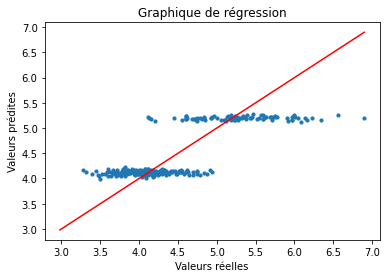

In [49]:
# Tracé du graphique de régression
plt.scatter(y_test, y_predi, s=10)
plt.plot([df_billet['margin_low'].min(), df_billet['margin_low'].max()], [df_billet['margin_low'].min(), df_billet['margin_low'].max()], color='red')
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Graphique de régression')
plt.show()

# 4. observation bivarié des variables

Les observations bivariées permettent de voir les liens entres les variables. Cela permet de comprendre comment les variables sont associées et de déterminer si une relation significative existe entre elles. 

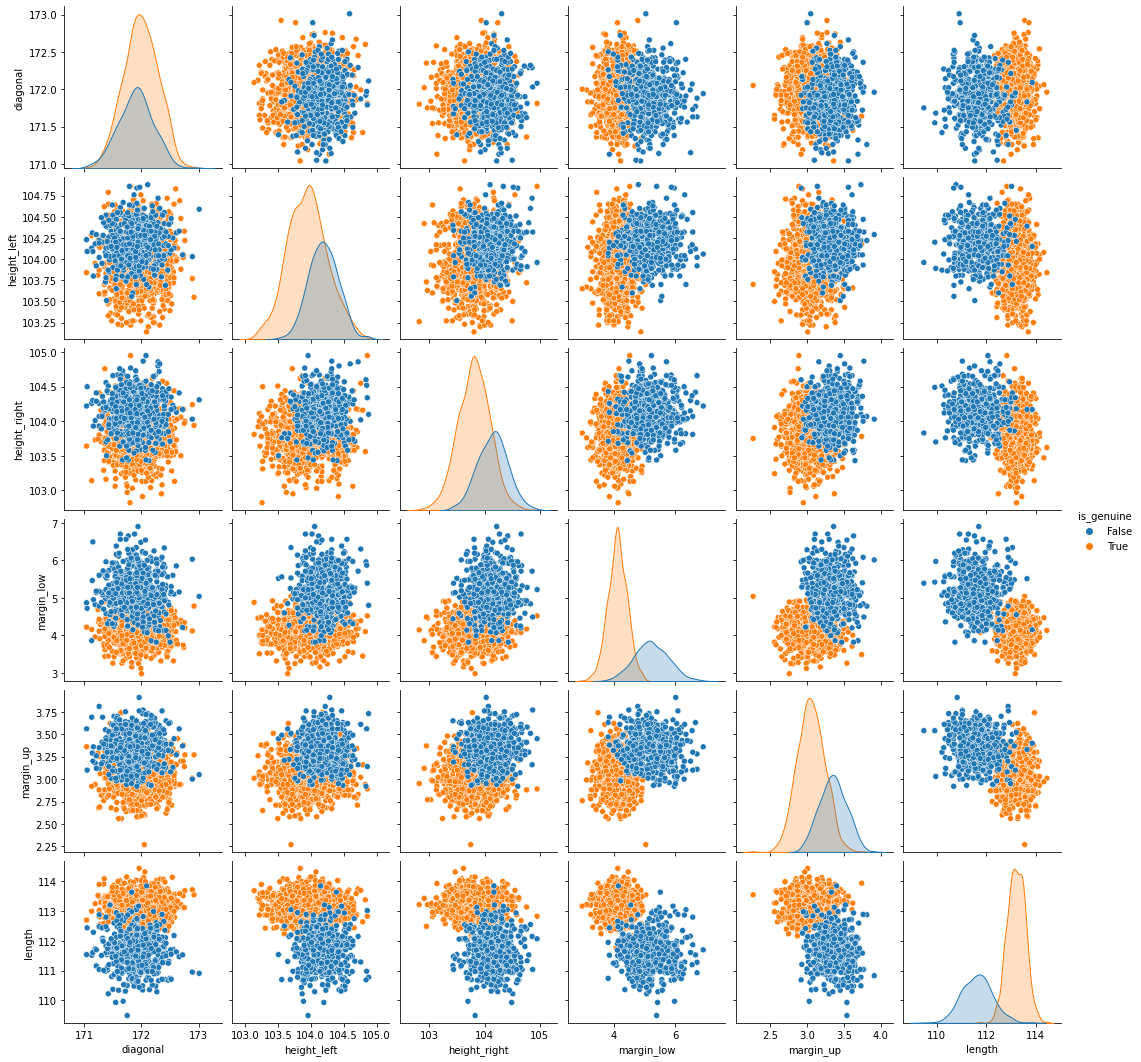

In [50]:
sns.pairplot(df_billet, hue='is_genuine')

# 5. répartition vrai billet et faux billet dans le dataframe

Pourcentage de vrais billets: 67.0 %
Pourcentage de faux billets: 33.0 %


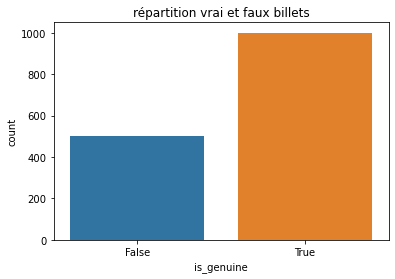

In [51]:
# Calcul du pourcentage de vrais et de faux billet dans le df_billet
counts = df_billet['is_genuine'].value_counts()
total = counts.sum()
percentage_true = round((counts[True] / total),2) * 100
percentage_false = round((counts[False] / total),2) * 100

# Affichage des résultats
print(f"Pourcentage de vrais billets: {percentage_true} %")
print(f"Pourcentage de faux billets: {percentage_false} %")

sns.countplot(data= df_billet, x='is_genuine')
plt.title('répartition vrai et faux billets')
plt.show()

# 6. Classification par régression logistique

## 6.1 regression logistique

Divisez le dataframe complet en ensembles d'entraînement et de test. L'ensemble d'entraînement sera utilisé pour ajuster le modèle, tandis que l'ensemble de test sera utilisé pour évaluer la performance du modèle sur de nouvelles données.  
important: conserver une proportion équilibrée des classes dans chaque ensemble

In [52]:
y = df_billet['is_genuine']
X = df_billet.drop('is_genuine', axis = 1)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Séparez les variables indépendantes (features) et la variable cible (target) dans les ensembles d'entraînement et de test

In [54]:
# instancier le modèle de régression logistique
logreg = LogisticRegression()

In [55]:
# entrainer le modèle sur les données d'entrainement (train_df)
logreg.fit(X_train, y_train)

LogisticRegression()

In [56]:
# prédire les valeurs de la variable cible pour les données test:
y_pred = logreg.predict(X_test)

## 6.2 Evaluation de la performance du modèle

Afin d'évaluer la performance du modèle nous allons regarder son niveau d'exactitude (accurancy), la précision du modèle, la rappel du modèle et enfin une courbe ROC AUC  

### Exactitude du modèle

In [57]:
# évaluer la performance du modèle en calculant l'exactitude (accuracy):
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitude du modèle : {accuracy * 100} %")

Exactitude du modèle : 99.0 %


Le modèle a une exactitude de 99% ce qui est très bon.  
Cependant, il est important de noter que l'exactitude seule ne suffit pas toujours pour évaluer la performance d'un modèle, surtout dans les cas de déséquilibre de classe. Lorsque les classes sont déséquilibrées, un modèle peut avoir une exactitude élevée en prédisant majoritairement la classe majoritaire, mais il peut ne pas être capable de détecter avec précision la classe minoritaire (dans notre cas, les faux billets).

### Précision du modèle

La fonction precision_score compare les valeurs prédites avec les valeurs réelles et calcule la précision en divisant le nombre de vrais positifs par la somme des vrais positifs et des faux positifs.

In [58]:
precision = precision_score(y_test, y_pred)
print(f"Précision du modèle : {precision * 100} %")

Précision du modèle : 99.00497512437812 %


### Sensibilité du modèle

Le rappel (recall), également appelé sensibilité, mesure la capacité d'un modèle à identifier correctement les exemples positifs (vrais billets) parmi tous les exemples réellement positifs présents dans les données. Cela permet d'évaluer la capacité du modèle à détecter les vrais billets de manière exhaustive.

La fonction recall_score compare les valeurs prédites avec les valeurs réelles et calcule le rappel en divisant le nombre de vrais positifs par la somme des vrais positifs et des faux négatifs.

In [59]:
recall = recall_score(y_test, y_pred)
print(f"Rappel du modèle : {recall * 100} %")

Rappel du modèle : 99.5 %


### Le F1-score

Le F1-score est une mesure qui combine à la fois la précision et le rappel en une seule métrique. Il est calculé comme la moyenne harmonique de la précision et du rappel, donnant ainsi une mesure globale de la performance du modèle en termes de trade-off entre la précision et le rappel.

Le F1-score est particulièrement utile lorsque vous avez un déséquilibre de classe, car il tient compte à la fois des vrais positifs et des faux négatifs.

In [60]:
f1score = f1_score(y_test, y_pred)
print(f"F1-score du modèle : {f1score}")

F1-score du modèle : 0.9925187032418954


Le F1-score est utile pour évaluer la performance globale du modèle en considérant à la fois la précision et le rappel. Une valeur de F1-score proche de 1 indique une bonne performance du modèle en termes d'équilibre entre la précision et le rappel.

### La courbe de ROC-AUC

La courbe ROC (Receiver Operating Characteristic) est un graphique qui représente la performance d'un modèle de classification binaire à différents seuils de classification. L'AUC (Area Under the Curve) de la courbe ROC mesure la capacité du modèle à classer correctement les exemples positifs et négatifs

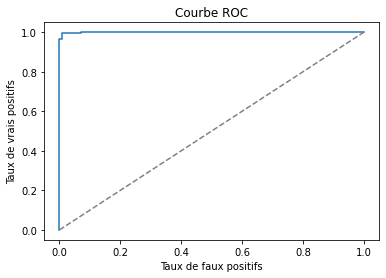

In [61]:
probas = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probas)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.show()

In [62]:
auc = roc_auc_score(y_test, probas)
print("Aire sous la courbe (AUC) :", auc)

Aire sous la courbe (AUC) : 0.99935


La courbe ROC est tracée en utilisant les taux de faux positifs (fpr) sur l'axe des abscisses et les taux de vrais positifs (tpr) sur l'axe des ordonnées. La ligne en pointillés représente la courbe ROC d'un modèle aléatoire. Un modèle avec une performance prédictive plus élevée aura une courbe ROC plus proche du coin supérieur gauche du graphique.

L'AUC est une mesure de la performance globale du modèle. Une valeur d'AUC proche de 1 indique une performance élevée, tandis qu'une valeur proche de 0.5 indique une performance médiocre (équivalente à un modèle aléatoire).

### Matrice de confusion

La matrice de confusion est une matrice carrée où les colonnes représentent les valeurs prédites et les lignes représentent les valeurs réelles. Elle contient quatre éléments : les vrais positifs (TP), les faux positifs (FP), les vrais négatifs (TN) et les faux négatifs (FN).

* Les vrais positifs (TP) représentent le nombre d'exemples positifs (vrais billets) correctement prédits comme positifs.
* Les faux positifs (FP) représentent le nombre d'exemples négatifs (faux billets) incorrectement prédits comme positifs.
* Les vrais négatifs (TN) représentent le nombre d'exemples négatifs correctement prédits comme négatifs.
* Les faux négatifs (FN) représentent le nombre d'exemples positifs incorrectement prédits comme négatifs.

In [63]:
confusion = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(confusion)

Matrice de confusion :
[[ 98   2]
 [  1 199]]


Pour plus de clareté les résultats sont donnés en pourcentage

In [64]:
total_samples = confusion.sum().sum()
confusion_percentage = confusion / total_samples * 100

confusion_df_percentage = pd.DataFrame(confusion_percentage, index=['Faux', 'Vrai'], columns=['Faux', 'Vrai'])
print("Matrice de confusion en pourcentage :")
print(confusion_df_percentage)

Matrice de confusion en pourcentage :
           Faux       Vrai
Faux  32.666667   0.666667
Vrai   0.333333  66.333333


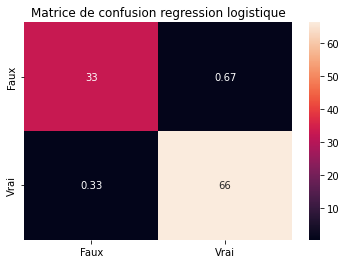

In [65]:
sns.heatmap(confusion_df_percentage, annot= True)
plt.title('Matrice de confusion regression logistique')
plt.show()

## 6.3 Crétion d'une fonction avec la regression linéaire pour prédire le type de billet sur un dataframe inconnu

In [66]:
def classifier_logreg(df):
    y_pred = logreg.predict(df) # fait la prédic avec logreg entraîner
    proba = logreg.predict_proba(df)[:,1] # calucul la proba que le billet soit vrai
    df["prediction"] = y_pred # crée une colonne avec la prédiction pour le billet
    df["proba_vrai"] = proba # crée une colonne avec la proba que le billet soit vrai
    return df

## 6.4 utilisation du modèle de régression linéaire sur le dataframe inconnu

In [67]:
df_testlog = pd.read_csv("billets_production.csv")
df_testlog.set_index("id", inplace= True)
df_testlog

,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42
A_2,171.87,104.17,104.13,6.00,3.31,112.09
A_3,172.00,104.58,104.29,4.99,3.39,111.57
A_4,172.49,104.55,104.34,4.44,3.03,113.20
A_5,171.65,103.63,103.56,3.77,3.16,113.33


In [68]:
classifier_logreg(df_testlog)

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction,proba_vrai
id,,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,False,0.004127
A_2,171.87,104.17,104.13,6.00,3.31,112.09,False,0.000786
A_3,172.00,104.58,104.29,4.99,3.39,111.57,False,0.001122
A_4,172.49,104.55,104.34,4.44,3.03,113.20,True,0.915712
A_5,171.65,103.63,103.56,3.77,3.16,113.33,True,0.999661


# 7. K-means

## 7.1 détermination du nombre optimal de cluster par la méthode du coude et la méthode silhouette

Le K-means est un algorithme de clustering (regroupement) non supervisé. Son objectif est de diviser un ensemble de données en K clusters (groupes) distincts, où chaque cluster est représenté par un centroïde qui est la moyenne des points du cluster.

La méthode du coude est une technique couramment utilisée pour déterminer le nombre optimal de clusters K à utiliser dans le K-means. Elle consiste à tracer l'inertie (ou somme des carrés des distances entre les points de données et leur centroïde respectif) en fonction du nombre de clusters K. L'inertie diminue généralement à mesure que K augmente, car chaque cluster aura tendance à contenir moins de points, mais le taux de diminution diminue également. La méthode du coude consiste à identifier le point sur le graphique où l'inertie commence à diminuer plus lentement, formant ainsi une sorte de "coude" (elbow en anglais). Ce point est souvent considéré comme le nombre optimal de clusters K à utiliser pour la division des données.

In [69]:
# pour chaque nombre de cluster, on entraine un k-means et on enregistre
# la valeur de l'inertie
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(df_billet)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

C:\Users\diass\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


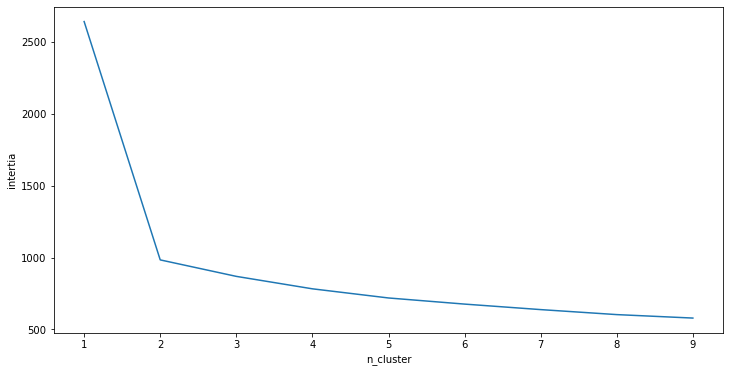

In [70]:
# On peut ensuite faire un graphique pour constater la "cassure" dans la courbe.
# On affiche en  x  le nombre de clusters, la variable k_list et en  y  la liste des inerties intraclasses,
#la variable  inertia:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

Le nombre optimal de cluster est de 2 dans notre cas ce qui est logique car nous avons deux classes (vrais billet / faux billets)

Le coefficient silhouette permet de quantifier à quel point chaque point de données est similaire aux autres membres de son propre groupe (cluster) par rapport aux groupes voisins. Le coefficient silhouette varie de -1 à 1. Une valeur proche de 1 indique que le point de données est bien placé dans son propre groupe, car il est plus proche des autres points de son groupe que des points des autres groupes.

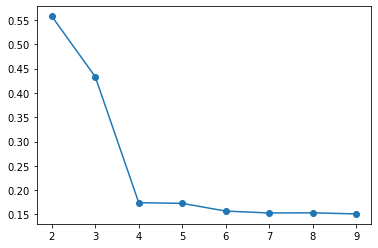

In [71]:
#Calcul  de la métrique "silhouette" pour différents nombres de groupes issus de la méthode des centres mobiles
#Liste pour stocker nos coefficients
silhouettes = [] 

#Boucle itérative de 2 à 10 (clusters) pour tester les possibilités
for k in range(2, 10): 
    #Création et ajustement d'un modèle pour chaque k
    cls = cluster.KMeans(n_clusters=k)  
    cls.fit(df_billet)
    
    #Stockage des coefficients associés
    silh = metrics.silhouette_score(df_billet, cls.labels_)
    silhouettes.append(silh)
    
#Visualisation des valeurs de coefficient de silhouette pour chaque nombre de cluster
plt.plot(range(2, 10), silhouettes, marker='o')
plt.show()

La méthode silhouette confirme la méthode du coude avec une division en deux clusters

## 7.2 réalisation du K-means

In [72]:
df_Kmeans = df_billet.loc[:,['diagonal', 'height_left', 'height_right', 'margin_low', 'length']]
df_Kmeans

,diagonal,height_left,height_right,margin_low,length
0,171.81,104.86,104.95,4.52,112.83
1,171.46,103.36,103.66,3.77,113.09
2,172.69,104.48,103.50,4.40,113.16
3,171.36,103.91,103.94,3.62,113.51
4,171.73,104.28,103.46,4.04,112.54
...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,111.28
1496,172.19,104.63,104.44,5.27,110.97
1497,171.80,104.01,104.12,5.51,111.95
1498,172.06,104.28,104.06,5.17,112.25


In [77]:
# création de la matrice (array numpy)
X = df_Kmeans.values
X.shape

(1500, 5)

In [78]:
# centrage réduction des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [79]:
# on fit le kmeans
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(X)

KMeans(n_clusters=2)

In [80]:
# création d'une variable correspondant au numéro de cluster kmeans
labels = kmeans_2.labels_
labels

array([1, 1, 1, ..., 0, 0, 0])

In [81]:
# ajout une colonne cluster avec le numéo de cluster correspondant
df_billet["cluster"] = labels
df_billet

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,True,171.81,104.86,104.95,4.52,2.89,112.83,1
1,True,171.46,103.36,103.66,3.77,2.99,113.09,1
2,True,172.69,104.48,103.50,4.40,2.94,113.16,1
3,True,171.36,103.91,103.94,3.62,3.01,113.51,1
4,True,171.73,104.28,103.46,4.04,3.48,112.54,1
...,...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28,0
1496,False,172.19,104.63,104.44,5.27,3.37,110.97,0
1497,False,171.80,104.01,104.12,5.51,3.36,111.95,0
1498,False,172.06,104.28,104.06,5.17,3.46,112.25,0


### Visualisation des clusters

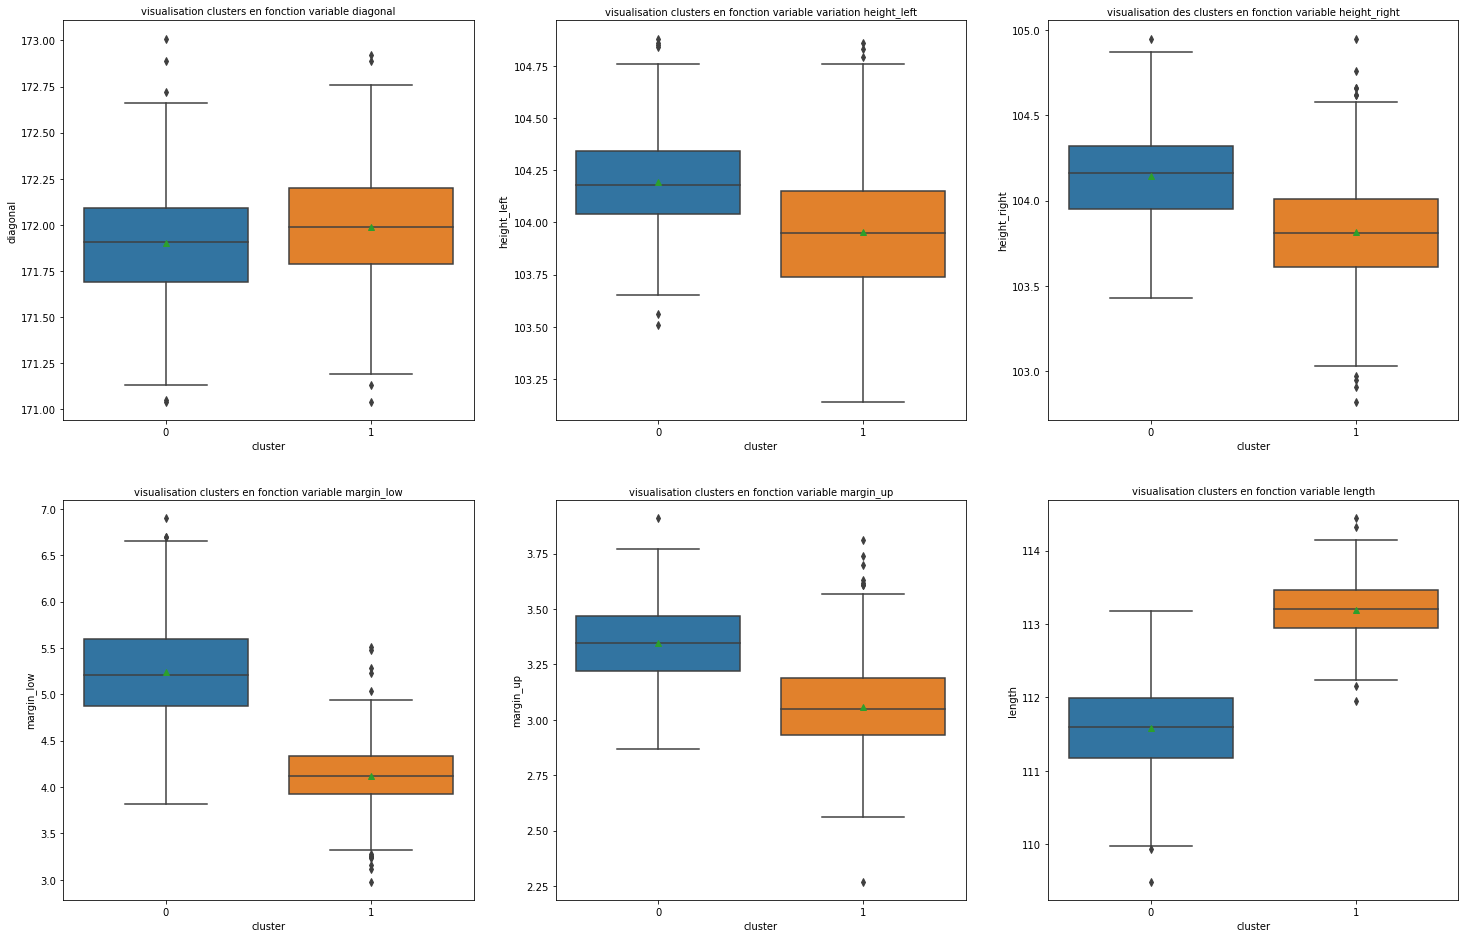

In [82]:
# visualisation en boxplot
plt.figure(figsize=(25,25))

plt.subplot(331)
sns.boxplot(data=df_billet, x="cluster", y="diagonal", showmeans=True)
plt.title("visualisation clusters en fonction variable diagonal", fontsize =10)

plt.subplot(332)
sns.boxplot(data=df_billet, x="cluster", y="height_left", showmeans=True)
plt.title("visualisation clusters en fonction variable variation height_left", fontsize =10)


plt.subplot(333)
sns.boxplot(data=df_billet, x="cluster", y="height_right", showmeans=True)
plt.title("visualisation des clusters en fonction variable height_right", fontsize =10)

plt.subplot(334)
sns.boxplot(data=df_billet, x="cluster", y="margin_low", showmeans=True)
plt.title("visualisation clusters en fonction variable margin_low", fontsize =10)

plt.subplot(335)
sns.boxplot(data=df_billet, x="cluster", y="margin_up", showmeans=True)
plt.title("visualisation clusters en fonction variable margin_up", fontsize =10)

plt.subplot(336)
sns.boxplot(data=df_billet, x="cluster", y="length", showmeans=True)
plt.title("visualisation clusters en fonction variable length", fontsize =10)

plt.show()

## 7.3 évaluation de la performance du modèle

In [83]:
# évaluer la performance du modèle en calculant l'exactitude (accuracy):
accuracy = accuracy_score(df_billet['is_genuine'], df_billet['cluster'])
print(f"Exactitude du modèle : {accuracy * 100} %")

Exactitude du modèle : 98.4 %


In [84]:
precision = precision_score(df_billet['is_genuine'], df_billet['cluster'])
print(f"Précision du modèle : {precision * 100} %")

Précision du modèle : 97.93713163064834 %


In [85]:
recall = recall_score(df_billet['is_genuine'], df_billet['cluster'])
print(f"Rappel du modèle : {recall * 100} %")

Rappel du modèle : 99.7 %


In [86]:
f1score = f1_score(df_billet['is_genuine'], df_billet['cluster'])
print(f"F1-score du modèle : {f1score}")

F1-score du modèle : 0.9881070366699704


In [87]:
confusion_km = confusion_matrix(df_billet['is_genuine'], df_billet['cluster'])
print("Matrice de confusion :")
print(confusion_km)

Matrice de confusion :
[[479  21]
 [  3 997]]


In [88]:
total_samples = confusion_km.sum().sum()
confusion_percentage_km = confusion_km / total_samples * 100

confusion_df_percentage_km = pd.DataFrame(confusion_percentage_km, index=['Faux', 'Vrai'], columns=['Faux', 'Vrai'])
print("Matrice de confusion en pourcentage :")
print(confusion_df_percentage_km)

Matrice de confusion en pourcentage :
           Faux       Vrai
Faux  31.933333   1.400000
Vrai   0.200000  66.466667


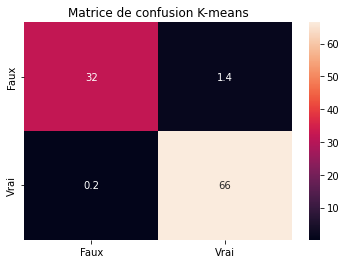

In [89]:
sns.heatmap(confusion_df_percentage_km, annot= True)
plt.title('Matrice de confusion K-means')
plt.show()

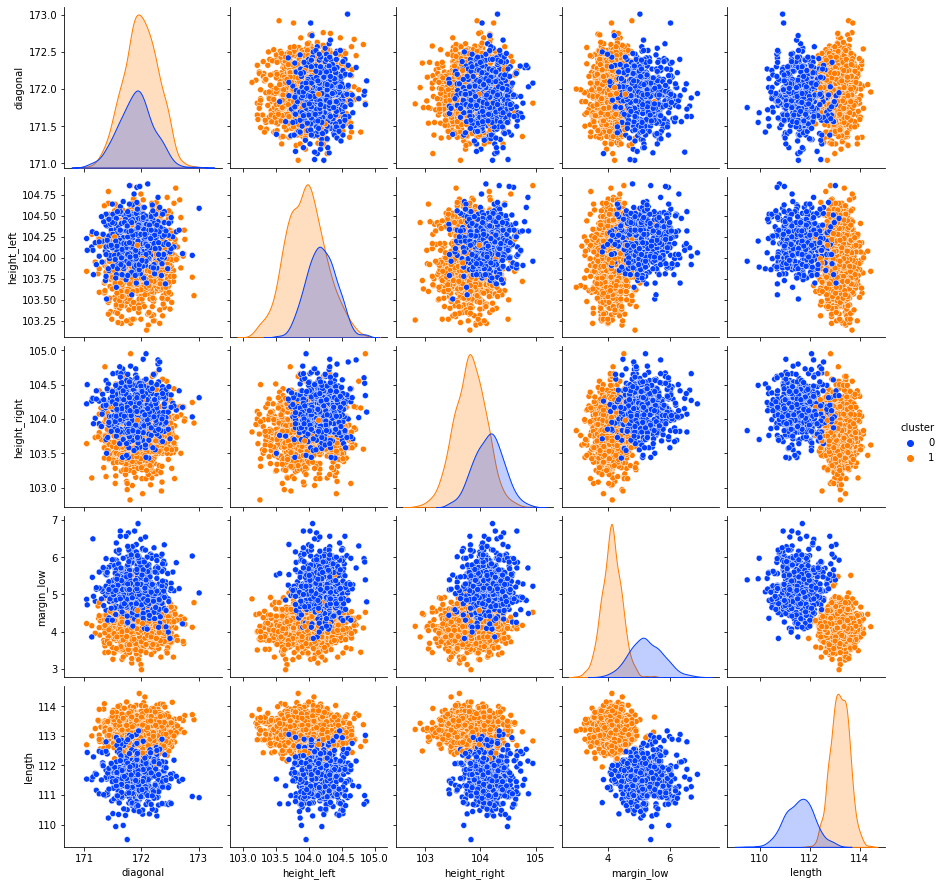

In [90]:
# Affichons cela de façon graphique :
sns.pairplot(df_billet[['diagonal', 'height_left', 'height_right', 'margin_low', 'length', 'cluster']], hue="cluster", palette="bright")

## 7.4 les centroides des clusters

In [91]:
# affichege des centroides pour chacun des clusters afin d'avoir leur score par variable
centroide = df_billet[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length', 'cluster']].groupby("cluster").mean()
centroide

,diagonal,height_left,height_right,margin_low,margin_up,length
cluster,,,,,,
0,171.900207,104.192116,104.144170,5.241371,3.346017,111.587344
1,171.986012,103.952554,103.814312,4.123810,3.059361,113.195138


## 7.5 Crétion d'une fonction avec le k-means pour prédire le type de billet sur un dataframe inconnu

In [92]:
def classifier_km(df,centroide):
    t = df_test.values
    cluster = []
    centroide = centroide.values
    for i in range(len(t)):
        dif = centroide-t[i]
        dist = np.sqrt(np.sum(dif**2, axis=1))
        clas = np.argmin(dist)
        cluster.append(clas)
    df['cluster']= cluster
    return df

## 7.6 utilisation de la fonction classifier_km sur le dataframe inconnu

In [93]:
df_test = pd.read_csv("billets_production.csv")
df_test

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [94]:
df_test.set_index("id", inplace= True)
df_test

,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42
A_2,171.87,104.17,104.13,6.00,3.31,112.09
A_3,172.00,104.58,104.29,4.99,3.39,111.57
A_4,172.49,104.55,104.34,4.44,3.03,113.20
A_5,171.65,103.63,103.56,3.77,3.16,113.33


In [95]:
classifier_km(df_test, centroide)

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
id,,,,,,,
A_1,171.76,104.01,103.54,5.21,3.30,111.42,0
A_2,171.87,104.17,104.13,6.00,3.31,112.09,0
A_3,172.00,104.58,104.29,4.99,3.39,111.57,0
A_4,172.49,104.55,104.34,4.44,3.03,113.20,1
A_5,171.65,103.63,103.56,3.77,3.16,113.33,1


In [100]:
df_test_ex = pd.read_csv("billets_test.csv")
df_test_ex

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [101]:
df_test_ex.set_index("id", inplace=True)
df_test_ex

,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,
B_1,172.09,103.95,103.73,4.39,3.09,113.19
B_2,171.52,104.17,104.03,5.27,3.16,111.82
B_3,171.78,103.80,103.75,3.81,3.24,113.39
B_4,172.02,104.08,103.99,5.57,3.30,111.10
B_5,171.79,104.34,104.37,5.00,3.07,111.87


In [102]:
classifier_logreg(df_test_ex)

,diagonal,height_left,height_right,margin_low,margin_up,length,prediction,proba_vrai
id,,,,,,,,
B_1,172.09,103.95,103.73,4.39,3.09,113.19,True,0.989428
B_2,171.52,104.17,104.03,5.27,3.16,111.82,False,0.007803
B_3,171.78,103.80,103.75,3.81,3.24,113.39,True,0.999235
B_4,172.02,104.08,103.99,5.57,3.30,111.10,False,0.000109
B_5,171.79,104.34,104.37,5.00,3.07,111.87,False,0.011523


In [103]:
df_test_ex = pd.read_csv("billets_test.csv")
df_test_ex

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,172.09,103.95,103.73,4.39,3.09,113.19,B_1
1,171.52,104.17,104.03,5.27,3.16,111.82,B_2
2,171.78,103.80,103.75,3.81,3.24,113.39,B_3
3,172.02,104.08,103.99,5.57,3.30,111.10,B_4
4,171.79,104.34,104.37,5.00,3.07,111.87,B_5


In [104]:
df_test_ex.set_index("id", inplace=True)
df_test_ex

,diagonal,height_left,height_right,margin_low,margin_up,length
id,,,,,,
B_1,172.09,103.95,103.73,4.39,3.09,113.19
B_2,171.52,104.17,104.03,5.27,3.16,111.82
B_3,171.78,103.80,103.75,3.81,3.24,113.39
B_4,172.02,104.08,103.99,5.57,3.30,111.10
B_5,171.79,104.34,104.37,5.00,3.07,111.87
